In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont, Image
from matplotlib import patches, patheffects
import pandas as pd
import random

In [3]:
pip install fastai==0.7.0 --no-deps

Note: you may need to restart the kernel to use updated packages.


In [4]:
#path to deepfashion dataset
PATH = Path('./Data')
JPEGS = 'img'

In [5]:
# Open the file
f = (PATH/'list_bbox.txt').open().readlines()[2:]

In [6]:
# Split the line using ,
f[0].replace('                        ',' ').split()

['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg', '072', '079', '232', '273']

In [7]:
# add , to each row
splitValues= [row.replace('                        ',' ').split() for row in f]

In [8]:
# Extend dress type at the end
for i,row in enumerate(splitValues):
    dressType=row[0].split('/')[1].split('_')[-1]
    splitValues[i].extend([dressType])

In [9]:
splitValues

[['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg',
  '072',
  '079',
  '232',
  '273',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000002.jpg',
  '067',
  '059',
  '155',
  '161',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000003.jpg',
  '065',
  '065',
  '156',
  '200',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000004.jpg',
  '051',
  '062',
  '167',
  '182',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000005.jpg',
  '046',
  '088',
  '166',
  '262',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000006.jpg',
  '047',
  '067',
  '211',
  '241',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000007.jpg',
  '018',
  '073',
  '200',
  '241',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000008.jpg',
  '075',
  '074',
  '197',
  '246',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000009.jpg',
  '024',
  '056',
  '149',
  '235',
  'Blouse'],
 ['img/Sheer_Pleated-Front_Blouse/img_00000010.jpg',
  '019',
  '096',
  '192',
  

In [10]:
# Convert to dataframe
df = pd.DataFrame(splitValues,columns=['location','x1','y1','x2','y2','dressType'])
df_sub_copy = df.copy()
df

,location,x1,y1,x2,y2,dressType
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,072,079,232,273,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,067,059,155,161,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,065,065,156,200,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,051,062,167,182,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,046,088,166,262,Blouse
...,...,...,...,...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,001,001,300,300,Dress
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,014,058,225,277,Dress
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,018,041,149,230,Dress
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,075,047,220,300,Dress


In [11]:
# Convert x1, x2, y1, y2 values to int for simplicity
df.x1 = df.x1.astype(int)
df.x2 = df.x2.astype(int)
df.y1 = df.y1.astype(int)
df.y2 = df.y2.astype(int)
df

,location,x1,y1,x2,y2,dressType
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262,Blouse
...,...,...,...,...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,1,1,300,300,Dress
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,14,58,225,277,Dress
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,18,41,149,230,Dress
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,75,47,220,300,Dress


In [12]:
df.dressType.unique()

array(['Blouse', 'Blazer', 'Button-Down', 'Bomber', 'Anorak', 'Tee',
       'Tank', 'Top', 'Sweater', 'Flannel', 'Hoodie', 'Cardigan',
       'Jacket', 'Henley', 'Poncho', 'Jersey', 'Turtleneck', 'Parka',
       'Peacoat', 'Halter', 'Skirt', 'Shorts', 'Jeans', 'Joggers',
       'Sweatpants', 'Jeggings', 'Cutoffs', 'Sweatshorts', 'Leggings',
       'Culottes', 'Chinos', 'Trunks', 'Sarong', 'Gauchos', 'Jodhpurs',
       'Capris', 'Dress', 'Romper', 'Coat', 'Kimono', 'Jumpsuit', 'Robe',
       'Caftan', 'Kaftan', 'Coverup', 'Onesie'], dtype=object)

In [13]:
# Count of types of dress
dressTypeCount= df.dressType.value_counts().sort_values(ascending=False)
dressTypeCount

Dress          72158
Tee            36887
Blouse         24557
Shorts         19666
Tank           15429
Skirt          14773
Cardigan       13311
Sweater        13123
Jacket         10467
Top            10078
Blazer          7495
Romper          7408
Jeans           7076
Jumpsuit        6153
Leggings        5013
Joggers         4416
Hoodie          4048
Sweatpants      3048
Kimono          2294
Coat            2120
Cutoffs         1669
Sweatshorts     1106
Poncho           791
Jersey           748
Henley           716
Parka            676
Jeggings         594
Chinos           527
Culottes         486
Trunks           386
Button-Down      330
Flannel          324
Bomber           309
Anorak           160
Robe             150
Turtleneck       146
Kaftan           126
Peacoat           97
Capris            77
Onesie            70
Caftan            54
Gauchos           49
Jodhpurs          45
Sarong            32
Halter            17
Coverup           17
Name: dressType, dtype: int64

In [14]:
# Choose only Dress type
dressTypeCountDownSample = dressTypeCount[dressTypeCount> 45000].index.values
dressTypeCountDownSample

array(['Dress'], dtype=object)

In [15]:
# Choose 45,0000 dress samples
downsample = df[df.dressType.isin(dressTypeCountDownSample)].groupby(
    'dressType').apply(
    lambda v : v.iloc[random.sample(range(len(v)),45000)]).reset_index(drop=True)
downsample

,location,x1,y1,x2,y2,dressType
0,img/Heathered_T-Shirt_Dress/img_00000057.jpg,1,73,147,245,Dress
1,img/Faux_Leather_Cami_Dress/img_00000037.jpg,1,1,205,300,Dress
2,img/Tulle_Overlay_Cami_Dress/img_00000008.jpg,71,37,143,226,Dress
3,img/Beaded_Collar_Empire-Waist_Dress/img_00000...,81,24,183,300,Dress
4,img/Abstract_Plaid_Babydoll_Dress/img_00000061...,79,65,233,270,Dress
...,...,...,...,...,...,...
44995,img/Gathered_Floral_Lace_Dress/img_00000007.jpg,26,29,93,160,Dress
44996,img/Square_Neck_Bodycon_Dress/img_00000047.jpg,42,52,172,285,Dress
44997,img/Side-Slit_Midi_Dress/img_00000043.jpg,76,28,165,236,Dress
44998,img/Pleated_Jacquard_Tea_Dress/img_00000012.jpg,65,32,161,182,Dress


In [16]:
# Other additional dress
df = pd.concat((df[~df.dressType.isin(dressTypeCountDownSample)],downsample)).sample(frac=1)
df

,location,x1,y1,x2,y2,dressType
66760,img/Abstract_Print_Colorblock_Top/img_00000041...,25,16,233,300,Top
73825,img/Contrast-Trimmed_Tank/img_00000018.jpg,46,71,167,272,Tank
122474,img/Nautical_Palm_Print_Tee/img_00000040.jpg,48,66,289,279,Tee
213077,img/Cutout_Gaucho_Jumpsuit/img_00000027.jpg,50,20,160,300,Jumpsuit
172320,img/Tropical_Print_Mini_Skirt/img_00000043.jpg,15,50,207,268,Skirt
...,...,...,...,...,...,...
190346,img/Enchanted_Floral_Layered_Skirt/img_0000002...,32,91,94,133,Skirt
84692,img/Drop-Sleeve_V-Neck_Sweater/img_00000034.jpg,23,71,189,279,Sweater
248627,img/Strapless_Jumpsuit/img_00000037.jpg,106,50,209,300,Jumpsuit
161907,img/Voyager_Shorts/img_00000051.jpg,111,131,178,190,Shorts


In [17]:
dressTypeToMerge = dressTypeCount[dressTypeCount<300].index.values
dressTypeToMerge

array(['Anorak', 'Robe', 'Turtleneck', 'Kaftan', 'Peacoat', 'Capris',
       'Onesie', 'Caftan', 'Gauchos', 'Jodhpurs', 'Sarong', 'Halter',
       'Coverup'], dtype=object)

In [18]:
df['dressType'] = df.dressType.apply(lambda x : 'Other' if x in dressTypeToMerge else x)

In [19]:
cleanedDressType = df.dressType.unique()
cleanedDressType.sort()
cleanedDressType

array(['Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Cardigan', 'Chinos',
       'Coat', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Henley',
       'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Joggers',
       'Jumpsuit', 'Kimono', 'Leggings', 'Other', 'Parka', 'Poncho',
       'Romper', 'Shorts', 'Skirt', 'Sweater', 'Sweatpants',
       'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks'], dtype=object)

In [20]:
# Apply to index
rowToCol = {col:row for row,col in enumerate(cleanedDressType)}
colToRow = {row:col for row,col in enumerate(cleanedDressType)}

In [21]:
df.dressType = df.dressType.apply(lambda x : rowToCol[x])
df.dressType

66760     32
73825     30
122474    31
213077    18
172320    26
          ..
190346    26
84692     27
248627    18
161907    25
21305      9
Name: dressType, Length: 262064, dtype: int64

In [22]:
df.dressType.max()

33

In [23]:
# Images

In [24]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [25]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [26]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [27]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [28]:
def bb_hw(a): 
    return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [29]:
im_a = df[['y1','x1','y2','x2']].values

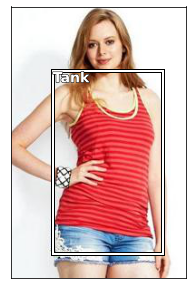

In [30]:
# Location of image and print image
fig,ax = plt.subplots(figsize=(5,5))
num = 1
PATH= Path("/Volumes/extdata2/SjsuProjectData/")
im = Image.open(PATH/df.location.iloc[num])
ax = show_img(im,ax=ax)
b = bb_hw(im_a[num])
draw_rect(ax, b)
draw_text(ax, b[:2], colToRow[df.iloc[num]['dressType']])

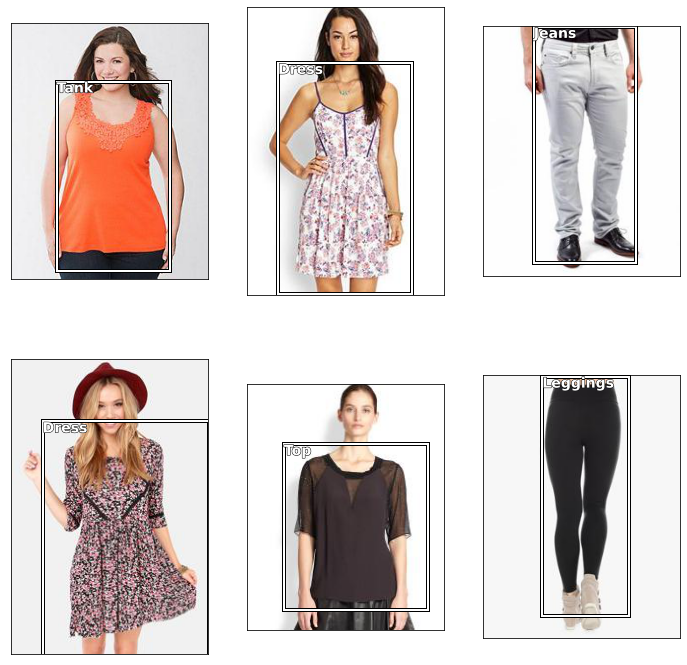

In [31]:
num_list = np.random.randint(0,len(df),6)
fig,axes = plt.subplots(2,3, figsize=(12,12))
for i,ax in enumerate(axes.flat):
    num = num_list[i]
    im = Image.open(PATH/df.location.iloc[num])
    ax = show_img(im,ax=ax)
    b = bb_hw(im_a[num])
    draw_rect(ax, b)
    draw_text(ax, b[:2], colToRow[df.iloc[num]['dressType']])

In [32]:
upperbody = ['Blouse', 'Blazer', 'Button-Down', 'Bomber', 'Anorak', 'Tee',
       'Tank', 'Top', 'Sweater', 'Flannel', 'Hoodie', 'Cardigan',
       'Jacket', 'Henley', 'Poncho', 'Jersey', 'Turtleneck', 'Parka',
       'Peacoat', 'Halter']
lowerbody = ['Skirt', 'Shorts', 'Jeans', 'Joggers',
       'Sweatpants', 'Jeggings', 'Cutoffs', 'Sweatshorts', 'Leggings',
       'Culottes', 'Chinos', 'Trunks', 'Sarong', 'Gauchos', 'Jodhpurs',
       'Capris', 'Dress', 'Romper', 'Coat', 'Kimono', 'Jumpsuit', 'Robe',
       'Caftan', 'Kaftan', 'Coverup', 'Onesie']

In [43]:
df_dressType= df_sub_copy.groupby(df_sub_copy['dressType'])
df_dressType.head()

,location,x1,y1,x2,y2,dressType
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,072,079,232,273,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,067,059,155,161,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,065,065,156,200,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,051,062,167,182,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,046,088,166,262,Blouse
...,...,...,...,...,...,...
271542,img/Panda-Hood_Pajama_Onesie/img_00000001.jpg,025,034,127,300,Onesie
271543,img/Panda-Hood_Pajama_Onesie/img_00000002.jpg,069,060,211,261,Onesie
271544,img/Panda-Hood_Pajama_Onesie/img_00000003.jpg,069,095,215,242,Onesie
271545,img/Panda-Hood_Pajama_Onesie/img_00000004.jpg,054,030,133,300,Onesie


In [68]:
df_upper_Blouse=df_sub_copy[df_sub_copy['dressType']=='Blouse']
df_lower_skirt=df_sub_copy[df_sub_copy['dressType']=='Skirt']
df_upper_Blouse.head()

,location,x1,y1,x2,y2,dressType
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,072,079,232,273,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,067,059,155,161,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,065,065,156,200,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,051,062,167,182,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,046,088,166,262,Blouse


In [69]:
df_lower_skirt.head()

,location,x1,y1,x2,y2,dressType
139709,img/Mineral_Wash_Mini_Skirt/img_00000001.jpg,074,001,166,180,Skirt
139710,img/Mineral_Wash_Mini_Skirt/img_00000002.jpg,001,007,204,263,Skirt
139711,img/Mineral_Wash_Mini_Skirt/img_00000003.jpg,050,098,157,181,Skirt
139712,img/Mineral_Wash_Mini_Skirt/img_00000004.jpg,095,015,210,121,Skirt
139713,img/Mineral_Wash_Mini_Skirt/img_00000005.jpg,055,021,254,200,Skirt
